In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
df=pd.read_csv("training_data.csv")

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   104985 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

In [5]:
df.isnull().sum()

ID                             0
Date_Of_Disbursement         235
Business                      15
Jobs_Reatained                 0
Jobs_Created                   0
Year_Of_Commitment             0
Guaranteed_Approved _Loan      0
Borrower_Name                  3
Low_Documentation_Loan       367
Demography                     0
State_Of_Bank                  0
ChargedOff_Amount              0
Borrower_City                  0
Borrower_State                 0
Gross_Amount_Balance           0
Count_Employees                0
Classification_Code            0
Loan_Approved_Gross            0
Gross_Amount_Disbursed         0
Loan_Term                      0
Commitment_Date                0
Primary_Loan_Digit             0
Code_Franchise                 0
Name_Of_Bank                   0
Revolving_Credit_Line        491
Default                        0
dtype: int64

In [6]:
df.dtypes

ID                            int64
Date_Of_Disbursement         object
Business                     object
Jobs_Reatained                int64
Jobs_Created                  int64
Year_Of_Commitment           object
Guaranteed_Approved _Loan    object
Borrower_Name                object
Low_Documentation_Loan       object
Demography                   object
State_Of_Bank                object
ChargedOff_Amount            object
Borrower_City                object
Borrower_State               object
Gross_Amount_Balance         object
Count_Employees               int64
Classification_Code           int64
Loan_Approved_Gross          object
Gross_Amount_Disbursed       object
Loan_Term                     int64
Commitment_Date              object
Primary_Loan_Digit            int64
Code_Franchise                int64
Name_Of_Bank                 object
Revolving_Credit_Line        object
Default                       int64
dtype: object

In [7]:
df.shape

(105000, 26)

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,105000.0,NaN,NaN,NaN,52499.5,30311.03347,0.0,26249.75,52499.5,78749.25,104999.0
Date_Of_Disbursement,104765,3505,31-Jul-95,1111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business,104985,3,Existing,75091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jobs_Reatained,105000.0,NaN,NaN,NaN,12.688648,270.544185,0.0,0.0,1.0,4.0,8800.0
Jobs_Created,105000.0,NaN,NaN,NaN,10.379248,270.340849,0.0,0.0,0.0,1.0,8800.0
Year_Of_Commitment,105000,91,2007,6769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Guaranteed_Approved _Loan,105000,10138,Rs.2032000.0,6464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Borrower_Name,104997,101068,SUBWAY,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low_Documentation_Loan,104633,7,No,92135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Demography,105000,3,Urban,57598,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 0


,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default


In [10]:
df.Default.value_counts(normalize="True")

0    0.722819
1    0.277181
Name: Default, dtype: float64

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Primary_Loan_Digit'>

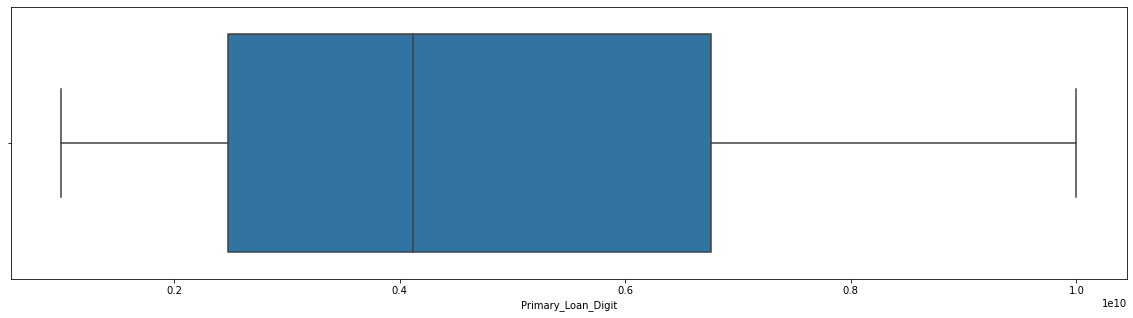

In [11]:
fig = plt.figure(figsize= (20,5))
sns.boxplot(df["Primary_Loan_Digit"])

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Term'>

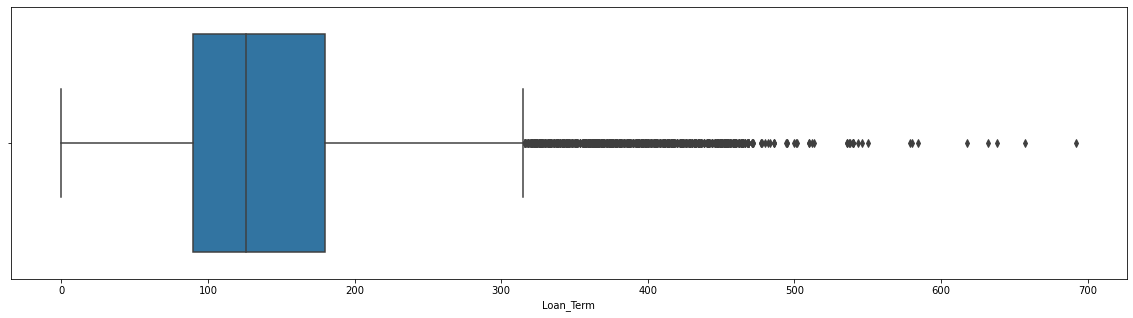

In [12]:
fig = plt.figure(figsize= (20,5))
sns.boxplot(df["Loan_Term"])

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 72x144 with 0 Axes>

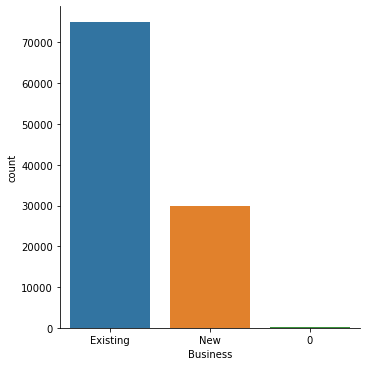

In [13]:
plt.figure(figsize=(1,2))
sns.catplot('Business', kind='count', data=df)

In [14]:
df["Guaranteed_Approved _Loan"] = df["Guaranteed_Approved _Loan"].apply(lambda x: x.replace("Rs.", "")) # Remove dollar sign
df["Guaranteed_Approved _Loan"] = df["Guaranteed_Approved _Loan"].astype("float") # Cast the column into type float
df.describe()["Guaranteed_Approved _Loan"]

count    1.050000e+05
mean     1.151738e+07
std      1.818916e+07
min      4.064000e+04
25%      1.625600e+06
50%      4.226560e+06
75%      1.316736e+07
max      3.657600e+08
Name: Guaranteed_Approved _Loan, dtype: float64

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Guaranteed_Approved _Loan'>

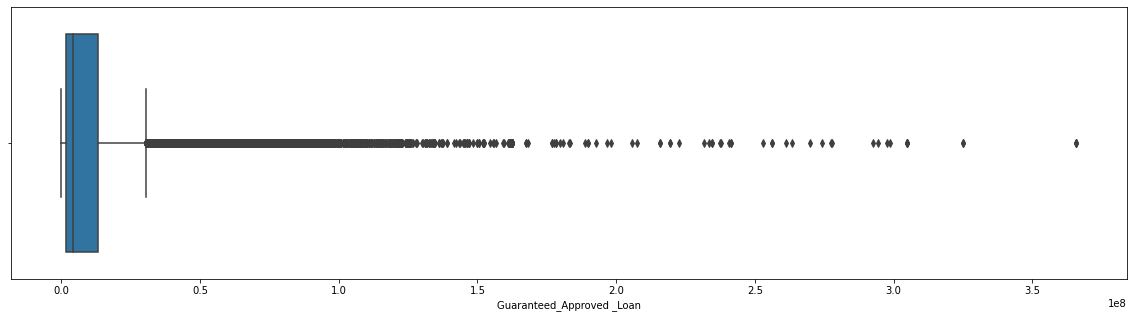

In [15]:
fig = plt.figure(figsize= (20,5))
sns.boxplot(df["Guaranteed_Approved _Loan"])

In [16]:
df["Loan_Approved_Gross"] = df["Loan_Approved_Gross"].apply(lambda x: x.replace("Rs.", "")) # Remove dollar sign
df["Loan_Approved_Gross"] = df["Loan_Approved_Gross"].apply(lambda x: x.replace(" ", "")) # Remove thousand separator
df["Loan_Approved_Gross"] = df["Loan_Approved_Gross"].astype("float") # Cast the column into type float
df.describe()["Loan_Approved_Gross"]

count    1.050000e+05
mean     1.492200e+07
std      2.262852e+07
min      8.128000e+04
25%      2.600960e+06
50%      6.502400e+06
75%      1.690624e+07
max      4.064000e+08
Name: Loan_Approved_Gross, dtype: float64

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Approved_Gross'>

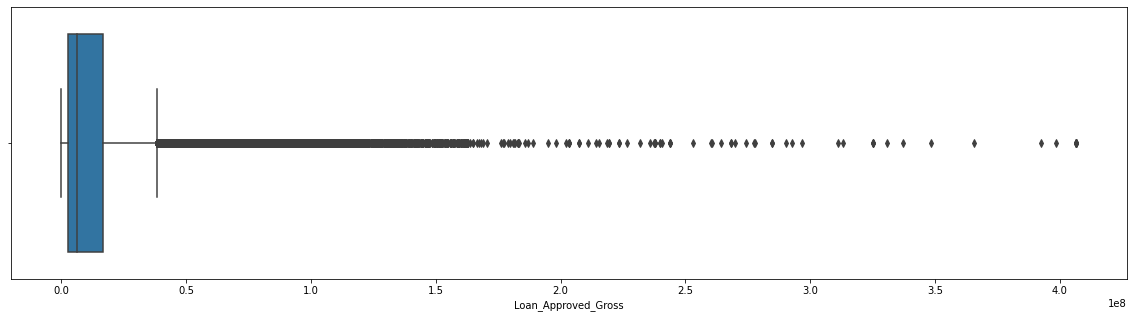

In [17]:
fig = plt.figure(figsize= (20,5))
sns.boxplot(df["Loan_Approved_Gross"])

In [18]:
print(df.columns.tolist())

['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained', 'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan', 'Borrower_Name ', 'Low_Documentation_Loan', 'Demography', 'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City', 'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees', 'Classification_Code ', 'Loan_Approved_Gross', 'Gross_Amount_Disbursed  ', 'Loan_Term', 'Commitment_Date', 'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank', 'Revolving_Credit_Line', 'Default']


In [19]:
df["Gross_Amount_Disbursed  "] = df["Gross_Amount_Disbursed  "].apply(lambda x: x.replace(" ", "")) 
df["Gross_Amount_Disbursed  "] = df["Gross_Amount_Disbursed  "].apply(lambda x: x.replace("Rs.", ""))
df["Gross_Amount_Disbursed  "] = df["Gross_Amount_Disbursed  "].astype("float") # Cast the column into type float
df.describe()["Gross_Amount_Disbursed  "]

count    1.050000e+05
mean     1.563878e+07
std      2.288627e+07
min      3.251200e+05
25%      3.251200e+06
50%      7.802880e+06
75%      1.812579e+07
max      7.311136e+08
Name: Gross_Amount_Disbursed  , dtype: float64

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gross_Amount_Disbursed  '>

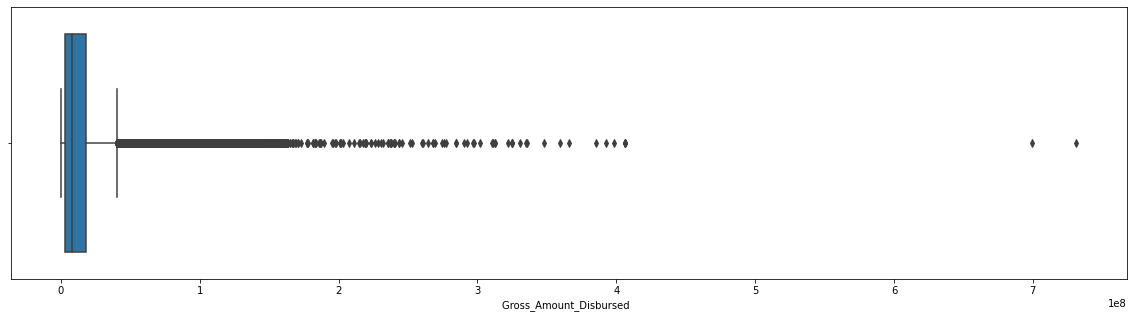

In [20]:
fig = plt.figure(figsize= (20,5))
sns.boxplot(df["Gross_Amount_Disbursed  "])

In [21]:
df["Gross_Amount_Balance"] = df["Gross_Amount_Balance"].apply(lambda x: x.replace(" ", "")) 
df["Gross_Amount_Balance"] = df["Gross_Amount_Balance"].apply(lambda x: x.replace("Rs.", ""))
df["Gross_Amount_Balance"] = df["Gross_Amount_Balance"].astype("float") # Cast the column into type float
df.describe()["Gross_Amount_Balance"]

count    1.050000e+05
mean     7.637843e+01
std      2.431197e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.876682e+06
Name: Gross_Amount_Balance, dtype: float64

In [22]:
df["ChargedOff_Amount "] = df["ChargedOff_Amount "].apply(lambda x: x.replace(" ", "")) 
df["ChargedOff_Amount "] = df["ChargedOff_Amount "].apply(lambda x: x.replace("Rs.", ""))
df["ChargedOff_Amount "] = df["ChargedOff_Amount "].astype("float") # Cast the column into type float
df.describe()["ChargedOff_Amount "]

count    1.050000e+05
mean     1.711913e+06
std      6.520106e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.170168e+05
max      1.625599e+08
Name: ChargedOff_Amount , dtype: float64

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChargedOff_Amount '>

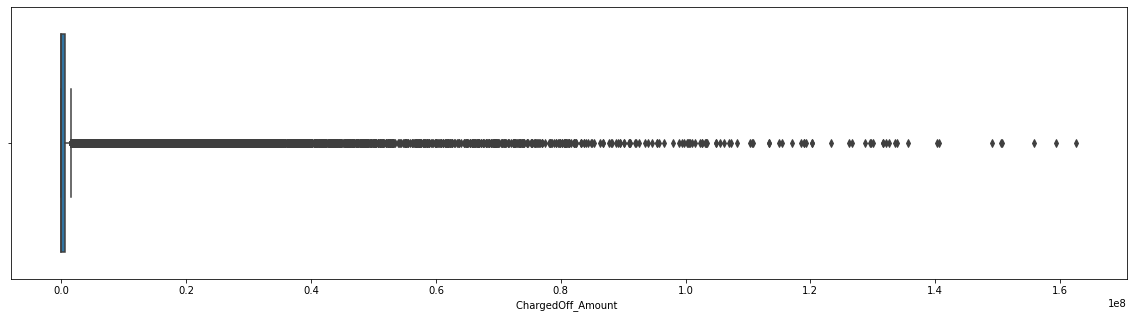

In [23]:
fig = plt.figure(figsize= (20,5))
sns.boxplot(df["ChargedOff_Amount "])

In [24]:
df["Gross_Amount_Balance"] = df["Gross_Amount_Balance"].astype("object") # Cast the column into type flo

In [25]:
df["Default"] = df["Default"].astype("object") 

In [26]:
df.dtypes

ID                             int64
Date_Of_Disbursement          object
Business                      object
Jobs_Reatained                 int64
Jobs_Created                   int64
Year_Of_Commitment            object
Guaranteed_Approved _Loan    float64
Borrower_Name                 object
Low_Documentation_Loan        object
Demography                    object
State_Of_Bank                 object
ChargedOff_Amount            float64
Borrower_City                 object
Borrower_State                object
Gross_Amount_Balance          object
Count_Employees                int64
Classification_Code            int64
Loan_Approved_Gross          float64
Gross_Amount_Disbursed       float64
Loan_Term                      int64
Commitment_Date               object
Primary_Loan_Digit             int64
Code_Franchise                 int64
Name_Of_Bank                  object
Revolving_Credit_Line         object
Default                       object
dtype: object

In [27]:
df1=df.drop(['Date_Of_Disbursement','Jobs_Reatained','Jobs_Created ','Year_Of_Commitment ','Borrower_Name ','Gross_Amount_Balance','Count_Employees','Classification_Code ','Commitment_Date','Code_Franchise','State_Of_Bank','Borrower_City','Borrower_State','Name_Of_Bank','Revolving_Credit_Line'], axis=1)

In [28]:
df1.head()

,ID,Business,Guaranteed_Approved _Loan,Low_Documentation_Loan,Demography,ChargedOff_Amount,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Default
0,0,Existing,33121600.0,No,Undefined,0.00,40640000.0,40640000.00,126,4419763001,0
1,1,New,32735520.0,No,Urban,38283367.68,43647360.0,43647360.00,123,1709796003,1
2,2,Existing,1422400.0,No,Urban,0.00,2844800.0,5961400.32,90,7464754008,0
3,3,New,2032000.0,No,Urban,0.00,4064000.0,4064000.00,126,1588745006,0
4,4,Existing,22981920.0,No,Urban,22862519.68,30642560.0,30642560.00,104,8037734002,1


In [29]:
df1.dtypes

ID                             int64
Business                      object
Guaranteed_Approved _Loan    float64
Low_Documentation_Loan        object
Demography                    object
ChargedOff_Amount            float64
Loan_Approved_Gross          float64
Gross_Amount_Disbursed       float64
Loan_Term                      int64
Primary_Loan_Digit             int64
Default                       object
dtype: object

In [30]:
df1.isnull().sum()

ID                             0
Business                      15
Guaranteed_Approved _Loan      0
Low_Documentation_Loan       367
Demography                     0
ChargedOff_Amount              0
Loan_Approved_Gross            0
Gross_Amount_Disbursed         0
Loan_Term                      0
Primary_Loan_Digit             0
Default                        0
dtype: int64

In [31]:
from numpy import nan

In [32]:
df1["Business"] = df1["Business"].replace(0, nan)
df1["Low_Documentation_Loan"] = df1["Low_Documentation_Loan"].replace(0, nan)

In [33]:
df1.isnull().sum()

ID                             0
Business                      15
Guaranteed_Approved _Loan      0
Low_Documentation_Loan       367
Demography                     0
ChargedOff_Amount              0
Loan_Approved_Gross            0
Gross_Amount_Disbursed         0
Loan_Term                      0
Primary_Loan_Digit             0
Default                        0
dtype: int64

In [34]:
df1['Low_Documentation_Loan'].fillna(df1['Low_Documentation_Loan'].mode()[0], inplace=True)

In [35]:
df1['Business'].fillna(df1['Business'].mode()[0], inplace=True)

In [36]:
df1.isnull().sum().sum()

0

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 288x432 with 0 Axes>

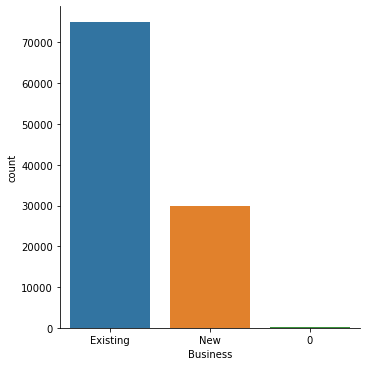

In [37]:
plt.figure(figsize=(4,6))
sns.catplot('Business', kind='count', data=df)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 288x432 with 0 Axes>

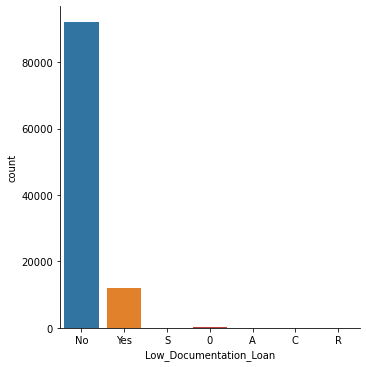

In [38]:
plt.figure(figsize=(4,6))
sns.catplot('Low_Documentation_Loan', kind='count', data=df)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Guaranteed_Approved _Loan', ylabel='Density'>

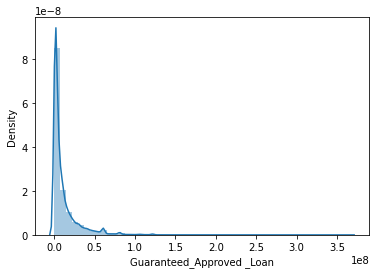

In [39]:
sns.distplot(df1['Guaranteed_Approved _Loan'])

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Approved_Gross', ylabel='Density'>

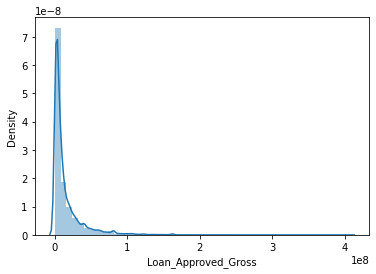

In [40]:
sns.distplot(df1['Loan_Approved_Gross'])

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gross_Amount_Disbursed  ', ylabel='Density'>

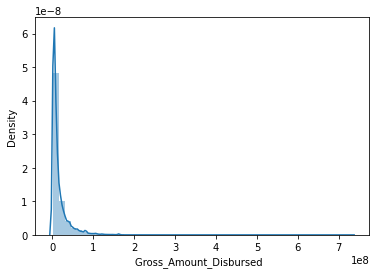

In [41]:
sns.distplot(df1['Gross_Amount_Disbursed  '])

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ChargedOff_Amount ', ylabel='Density'>

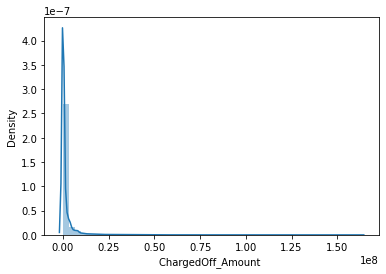

In [42]:
sns.distplot(df1['ChargedOff_Amount '])

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Primary_Loan_Digit', ylabel='Density'>

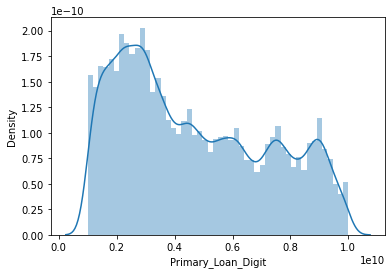

In [43]:
sns.distplot(df1['Primary_Loan_Digit'])

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Term', ylabel='Density'>

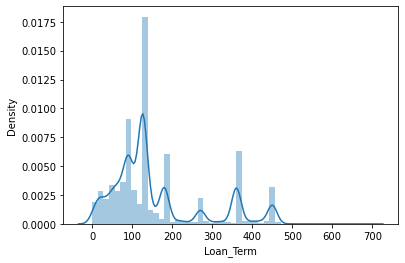

In [44]:
sns.distplot(df1['Loan_Term'])

<AxesSubplot:>

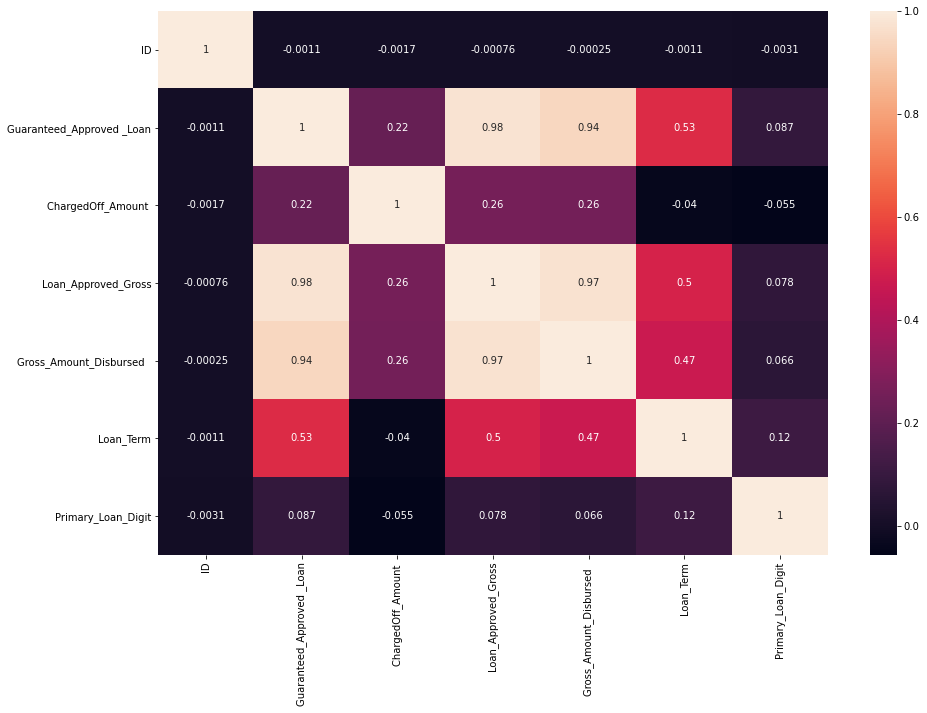

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

In [104]:
cols = ['Guaranteed_Approved _Loan','Loan_Approved_Gross','ChargedOff_Amount ','Primary_Loan_Digit','Loan_Term']

In [105]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [106]:
for column in df1[cols].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

In [107]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print(feature)
        print(df1[feature].value_counts())
        print('\n')

Business
Existing    75106
New         29789
0             105
Name: Business, dtype: int64


Low_Documentation_Loan
No     92502
Yes    12075
0        173
S         95
C         89
A         60
R          6
Name: Low_Documentation_Loan, dtype: int64


Demography
Urban        57598
Undefined    35099
Rural        12303
Name: Demography, dtype: int64


Default
0    75896
1    29104
Name: Default, dtype: int64




In [108]:
df1["Guaranteed_Approved _Loan"]=np.log(df1["Guaranteed_Approved _Loan"]+1)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Guaranteed_Approved _Loan', ylabel='Density'>

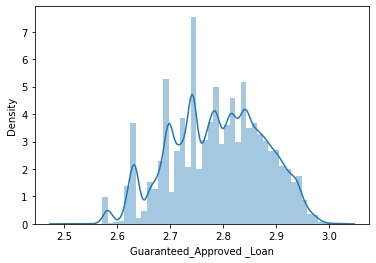

In [109]:
sns.distplot(df1["Guaranteed_Approved _Loan"])

In [110]:
df1["Loan_Approved_Gross"]=np.log(df1["Loan_Approved_Gross"]+1)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Approved_Gross', ylabel='Density'>

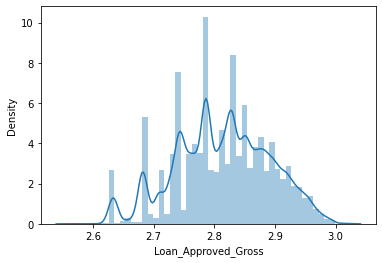

In [111]:
sns.distplot(df1["Loan_Approved_Gross"])

In [112]:
df1["Gross_Amount_Disbursed  "]=np.log(df1["Gross_Amount_Disbursed  "]+1)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gross_Amount_Disbursed  ', ylabel='Density'>

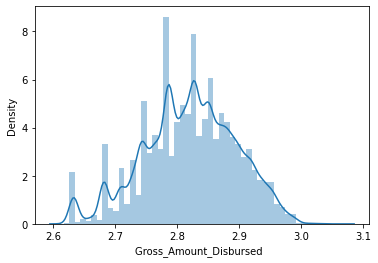

In [113]:
sns.distplot(df1["Gross_Amount_Disbursed  "])

In [114]:
df1["ChargedOff_Amount "]=np.log(df1["ChargedOff_Amount "]+1)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ChargedOff_Amount ', ylabel='Density'>

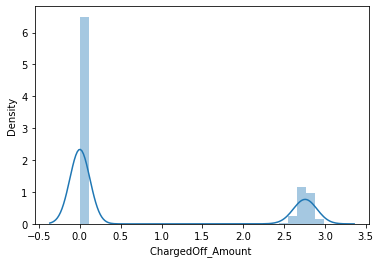

In [115]:
sns.distplot(df1["ChargedOff_Amount "])

In [116]:
df1["Primary_Loan_Digit"]=np.log(df1["Primary_Loan_Digit"]+1)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Primary_Loan_Digit', ylabel='Density'>

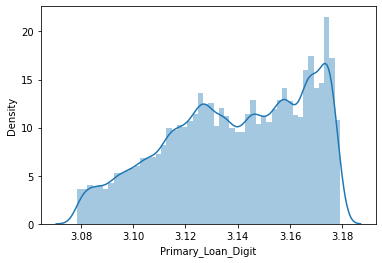

In [117]:
sns.distplot(df1["Primary_Loan_Digit"])

In [118]:
df1["Loan_Term"]=np.log(df1["Loan_Term"]+1)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Term', ylabel='Density'>

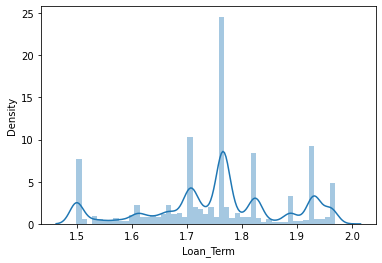

In [119]:
sns.distplot(df1["Loan_Term"])

In [120]:
df1

,ID,Business,Guaranteed_Approved _Loan,Low_Documentation_Loan,Demography,ChargedOff_Amount,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Default
0,0,Existing,2.907758,No,Undefined,0.000000,2.918865,2.918865,1.765448,3.144555,0
1,1,New,2.907118,No,Urban,2.915635,2.922713,2.922713,1.761349,3.102775,1
2,2,Existing,2.719179,No,Urban,0.000000,2.763863,2.809452,1.706721,3.166886,0
3,3,New,2.742421,No,Urban,0.000000,2.786102,2.786102,1.765448,3.099471,0
4,4,Existing,2.887602,No,Urban,2.887312,2.903502,2.903502,1.732356,3.169997,1
...,...,...,...,...,...,...,...,...,...,...,...
104995,104995,New,2.800445,Yes,Undefined,0.000000,2.813917,2.813917,1.824307,3.118292,0
104996,104996,New,2.818297,Yes,Rural,0.000000,2.827954,2.827954,1.777095,3.162649,0
104997,104997,New,2.681586,No,Urban,2.693707,2.727944,2.727944,1.516302,3.102142,1
104998,104998,Existing,2.844677,No,Urban,0.000000,2.844677,2.839644,1.929908,3.121732,0


In [121]:
df1_dummy = pd.get_dummies(df1,drop_first=True)
df1_dummy

,ID,Guaranteed_Approved _Loan,ChargedOff_Amount,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Business_Existing,Business_New,Low_Documentation_Loan_A,Low_Documentation_Loan_C,Low_Documentation_Loan_No,Low_Documentation_Loan_R,Low_Documentation_Loan_S,Low_Documentation_Loan_Yes,Demography_Undefined,Demography_Urban,Default_1
0,0,2.907758,0.000000,2.918865,2.918865,1.765448,3.144555,1,0,0,0,1,0,0,0,1,0,0
1,1,2.907118,2.915635,2.922713,2.922713,1.761349,3.102775,0,1,0,0,1,0,0,0,0,1,1
2,2,2.719179,0.000000,2.763863,2.809452,1.706721,3.166886,1,0,0,0,1,0,0,0,0,1,0
3,3,2.742421,0.000000,2.786102,2.786102,1.765448,3.099471,0,1,0,0,1,0,0,0,0,1,0
4,4,2.887602,2.887312,2.903502,2.903502,1.732356,3.169997,1,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,104995,2.800445,0.000000,2.813917,2.813917,1.824307,3.118292,0,1,0,0,0,0,0,1,1,0,0
104996,104996,2.818297,0.000000,2.827954,2.827954,1.777095,3.162649,0,1,0,0,0,0,0,1,0,0,0
104997,104997,2.681586,2.693707,2.727944,2.727944,1.516302,3.102142,0,1,0,0,1,0,0,0,0,1,1
104998,104998,2.844677,0.000000,2.844677,2.839644,1.929908,3.121732,1,0,0,0,1,0,0,0,0,1,0


In [122]:
df1_dummy.dtypes

ID                              int64
Guaranteed_Approved _Loan     float64
ChargedOff_Amount             float64
Loan_Approved_Gross           float64
Gross_Amount_Disbursed        float64
Loan_Term                     float64
Primary_Loan_Digit            float64
Business_Existing               uint8
Business_New                    uint8
Low_Documentation_Loan_A        uint8
Low_Documentation_Loan_C        uint8
Low_Documentation_Loan_No       uint8
Low_Documentation_Loan_R        uint8
Low_Documentation_Loan_S        uint8
Low_Documentation_Loan_Yes      uint8
Demography_Undefined            uint8
Demography_Urban                uint8
Default_1                       uint8
dtype: object

In [164]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df1_dummy[(df1_dummy['Default']==0)] 
df_minority = df1_dummy[(df1_dummy['Default']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 131177, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df2_dummy = pd.concat([df_minority_upsampled, df_majority])

In [165]:
df2_dummy.Default.value_counts(normalize="True")

1    0.633482
0    0.366518
Name: Default, dtype: float64

In [166]:
df2_dummy.rename(columns = {'Default_1':'Default'}, inplace = True)

In [167]:
x = df2_dummy.drop("Default",axis=1)

y=df2_dummy["Default"]

In [168]:
x.head()

,ID,Guaranteed_Approved _Loan,ChargedOff_Amount,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Business_Existing,Business_New,Low_Documentation_Loan_A,Low_Documentation_Loan_C,Low_Documentation_Loan_No,Low_Documentation_Loan_R,Low_Documentation_Loan_S,Low_Documentation_Loan_Yes,Demography_Undefined,Demography_Urban
85409,85409,2.742421,2.783862,2.786102,2.827954,1.738947,3.119696,1,0,0,0,1,0,0,0,0,1
57007,57007,2.670398,2.673125,2.681586,2.681586,1.725463,3.118587,1,0,0,0,1,0,0,0,0,1
2902,2902,2.786102,2.825593,2.827954,2.860190,1.499490,3.168865,1,0,0,0,1,0,0,0,0,1
19376,19376,2.792184,2.773806,2.805767,2.805767,1.777095,3.130087,0,1,0,0,0,0,0,1,0,1
77989,77989,2.903312,2.842531,2.912186,2.912186,1.931109,3.130070,1,0,0,0,1,0,0,0,1,0


In [169]:
y.head(20)

85409     1
57007     1
2902      1
19376     1
77989     1
43080     1
40642     1
79927     1
22437     1
60997     1
15856     1
79385     1
51988     1
101194    1
40942     1
99336     1
57885     1
29904     1
5836      1
2603      1
Name: Default, dtype: uint8

In [170]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,train_size=0.7, random_state=42)

In [173]:
X_validation= pd.read_csv("Test_data.csv")

In [174]:
X_validation.head()

,ID,Guaranteed_Approved _Loan,ChargedOff_Amount,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Business_Existing,Business_New,Low_Documentation_Loan_A,Low_Documentation_Loan_C,Low_Documentation_Loan_No,Low_Documentation_Loan_R,Low_Documentation_Loan_S,Low_Documentation_Loan_Yes,Demography_Undefined,Demography_Urban,Revolving_Credit_Line_Yes
0,105000,2.786102,2.827389,2.827954,2.836539,1.621454,21.255554,1,0,0,0,1,0,0,0,0,1,1
1,105001,2.721034,0.000000,2.727944,2.727944,1.706721,22.791246,1,0,0,0,0,0,0,1,1,0,0
2,105002,2.681586,2.727944,2.727944,2.775957,1.687642,21.582616,1,0,0,0,1,0,0,0,0,1,1
3,105003,2.742421,0.000000,2.786102,2.818361,1.487009,22.062118,0,1,0,0,1,0,0,0,0,1,1
4,105004,2.888771,0.000000,2.904653,2.904653,1.855302,22.901448,1,0,0,0,1,0,0,0,0,0,0


In [175]:
x_train.head()

,ID,Guaranteed_Approved _Loan,ChargedOff_Amount,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Primary_Loan_Digit,Business_Existing,Business_New,Low_Documentation_Loan_A,Low_Documentation_Loan_C,Low_Documentation_Loan_No,Low_Documentation_Loan_R,Low_Documentation_Loan_S,Low_Documentation_Loan_Yes,Demography_Undefined,Demography_Urban
79650,79650,2.742421,2.784213,2.786102,2.784404,1.698530,3.123808,1,0,0,0,1,0,0,0,0,1
65255,65255,2.762034,2.681586,2.772247,2.772247,1.560500,3.159122,0,1,0,0,0,0,0,1,0,1
30081,30081,2.681586,2.656827,2.727944,2.820916,1.499490,3.101692,1,0,0,0,1,0,0,0,0,1
88207,88207,2.742421,2.777237,2.786102,2.786102,1.643721,3.128089,1,0,0,0,1,0,0,0,0,1
74381,74381,2.925205,2.929381,2.940522,2.940522,1.702680,3.127562,1,0,0,0,1,0,0,0,0,1


In [176]:
x_train.dtypes

ID                              int64
Guaranteed_Approved _Loan     float64
ChargedOff_Amount             float64
Loan_Approved_Gross           float64
Gross_Amount_Disbursed        float64
Loan_Term                     float64
Primary_Loan_Digit            float64
Business_Existing               uint8
Business_New                    uint8
Low_Documentation_Loan_A        uint8
Low_Documentation_Loan_C        uint8
Low_Documentation_Loan_No       uint8
Low_Documentation_Loan_R        uint8
Low_Documentation_Loan_S        uint8
Low_Documentation_Loan_Yes      uint8
Demography_Undefined            uint8
Demography_Urban                uint8
dtype: object

In [177]:
X_validation.dtypes

ID                              int64
Guaranteed_Approved _Loan     float64
ChargedOff_Amount             float64
Loan_Approved_Gross           float64
Gross_Amount_Disbursed        float64
Loan_Term                     float64
Primary_Loan_Digit            float64
Business_Existing               int64
Business_New                    int64
Low_Documentation_Loan_A        int64
Low_Documentation_Loan_C        int64
Low_Documentation_Loan_No       int64
Low_Documentation_Loan_R        int64
Low_Documentation_Loan_S        int64
Low_Documentation_Loan_Yes      int64
Demography_Undefined            int64
Demography_Urban                int64
Revolving_Credit_Line_Yes       int64
dtype: object

In [178]:
X_validation=X_validation.drop(['Revolving_Credit_Line_Yes'],axis=1)

In [179]:
X_validation.shape

(45000, 17)

In [181]:
x_train.shape

(144951, 17)

# Naive_bayes

In [182]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [183]:
NB_model=GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [184]:
y_train_predict=NB_model.predict(x_train)
model_score=NB_model.score(x_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))

print(metrics.classification_report(y_train,y_train_predict))

0.9950190064228601
[[52620   331]
 [  391 91609]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     52951
           1       1.00      1.00      1.00     92000

    accuracy                           1.00    144951
   macro avg       0.99      0.99      0.99    144951
weighted avg       1.00      1.00      1.00    144951



In [185]:
y_test_predict=NB_model.predict(x_test)
model_score=NB_model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.994237146260584
[[22771   174]
 [  184 38993]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22945
           1       1.00      1.00      1.00     39177

    accuracy                           0.99     62122
   macro avg       0.99      0.99      0.99     62122
weighted avg       0.99      0.99      0.99     62122



# Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(x_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  1.1min finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [188]:
y_train_predict=Logistic_model.predict(x_train)
Logistic_model_score=Logistic_model.score(x_train,y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9950190064228601
[[52620   331]
 [  391 91609]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     52951
           1       1.00      1.00      1.00     92000

    accuracy                           1.00    144951
   macro avg       0.99      0.99      0.99    144951
weighted avg       1.00      1.00      1.00    144951



In [189]:
y_train_prob=Logistic_model.predict_proba(x_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.003386,0.996614
1,0.007985,0.992015
2,0.002684,0.997316
3,0.003160,0.996840
4,0.000559,0.999441


# Bagging

In [190]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [191]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=10, random_state=1)

Bagging_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1)

In [192]:
y_train_predict=Bagging_model.predict(x_train)
Bagging_model_score=Bagging_model.score(x_train,y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9997102469110251
[[52914    37]
 [    5 91995]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52951
           1       1.00      1.00      1.00     92000

    accuracy                           1.00    144951
   macro avg       1.00      1.00      1.00    144951
weighted avg       1.00      1.00      1.00    144951



In [193]:
submission_predictions=Bagging_model.predict(X_validation)
print(Bagging_model_score)

0.9997102469110251


In [194]:
submission_predictions =Bagging_model.predict(X_validation)

In [195]:
submission = pd.DataFrame({
        "ID": X_validation["ID"],
        "Default": submission_predictions
    })



In [196]:
submission

,ID,Default
0,105000,1
1,105001,0
2,105002,1
3,105003,0
4,105004,0
...,...,...
44995,149995,1
44996,149996,0
44997,149997,0
44998,149998,0


In [197]:
submission.to_csv(r'C:\Users\Arun Sivaji\project\Loan_Prediction-1.csv', index=False, header=True)

# Boosting

In [198]:
from sklearn.ensemble import AdaBoostClassifier

In [199]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [200]:
y_train_predict=ADB_model.predict(x_train)
ADB_model_score=ADB_model.score(x_train,y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9950259053059309
[[52621   330]
 [  391 91609]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     52951
           1       1.00      1.00      1.00     92000

    accuracy                           1.00    144951
   macro avg       0.99      0.99      0.99    144951
weighted avg       1.00      1.00      1.00    144951



In [202]:
submission_prediction_2=ADB_model.predict(X_validation)

In [203]:
submission_2= pd.DataFrame({
        "ID": X_validation["ID"],
        "Default": submission_predictions
    })


In [204]:
submission_2.to_csv(r'C:\Users\Arun Sivaji\project\Loan_Prediction-2.csv', index=False, header=True)

In [205]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [206]:
y_train_predict = gbc_model.predict(x_train)
gbc_model_score = gbc_model.score(x_train, y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9954881304716766
[[52643   308]
 [  346 91654]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     52951
           1       1.00      1.00      1.00     92000

    accuracy                           1.00    144951
   macro avg       1.00      1.00      1.00    144951
weighted avg       1.00      1.00      1.00    144951



In [207]:
submission_prediction_3=ADB_model.predict(X_validation)

In [208]:
submission_3= pd.DataFrame({
        "ID": X_validation["ID"],
        "Default": submission_predictions
    })


In [209]:
submission_3.to_csv(r'C:\Users\Arun Sivaji\project\Loan_Prediction-3.csv', index=False, header=True)